# Assignment Sheet 1

## Assignment 1.1

Consider a benchmark toy dataset like Iris. Download the dataset and inspect it manually using a text editor (like Notepad++). Next, inspect Iris using some tool-kits (like R-Studio, Weka GUI, KNIME, Python/Numpy/Pandas/Sk-learn). In context of Iris dataset, provide examples, screen-shots and explain the following in 1-2 short sentences:

a) How does the raw data look like? \
The SK dataset comes bundled in a dictionary-like structure called a bunch which contains the raw data as well as associated metadata. The raw data itself is a list of lists containing 4 float values each which correspond to 4 features (attributes): the length and width of sepals and petals. There is also a list of targets, distinguishing 3 species of the flowers (setosa, versicolor, virginica). 

b) What are Instances, Records, Observations? \
Instances refer to single data points, usually given as vectors of values. Records refer to full rows for data in a dataset table, similar to instances but more explicitly mapping each value to a feature. Observations refer to each unique data point, just like instances and records. The distinction between these is semantically subtle.\

Mathematically, we can describe a single record with all feature values as a vector $\vec{x}$ and a set of all instances $ \{\vec{x_1} ... \vec{x_i}\} $ as $\vec{X}$. Extending this to the features, say we have 6 different features, we can write $\vec{X} \in \mathbb{R}^6$

c) What are Attributes, Features, Feature Vectors?\
Attributes can be thought of as types of data that we can collect for each instance. By contrast, features may be more specifically related to the subset of attributes we choose to analyse. Feature vectors by contrast are vectors of values for each feature per instance that can actually be used by ML algorithms. 

d) What are Categories, State-of-Nature, Labels, Class-labels, Class, Target, Target-Variables?\
Categories are groups of classes into which instances can be classified, like "mammals" or "birds". State-of-nature refers to a set of possible classes a given observation may belong to. Labels are the class names we assign to instances. Class-labels are the specific values of labels we assign to instances. Class is a classification category (e.g., iris setosa which is the species in our case). Targets are the true classes of data points and target variables are the different variables we can target for classification.


e) What are Explanatory Variables Vs. Response Variables, Dependent Vs. Independent variables?
Explanatory and independent variables are synonymous. It is the variable manipulated by the researcher. In contrast, the dependent/response variable is not manipulated and simply observed. 

f) What is meant by distribution of a feature? (like Sepal length as an example)\
The distribution of a feature refers to the distribution of values that instances take for that specific feature, similar to how spread out the values are, e.g., normall distributed height. 

g) What are common methods to visualize more than 3 dimensions? Try PCA on IRIS data, what do you observe?

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d 
from sklearn.decomposition import PCA

iris = datasets.load_iris()

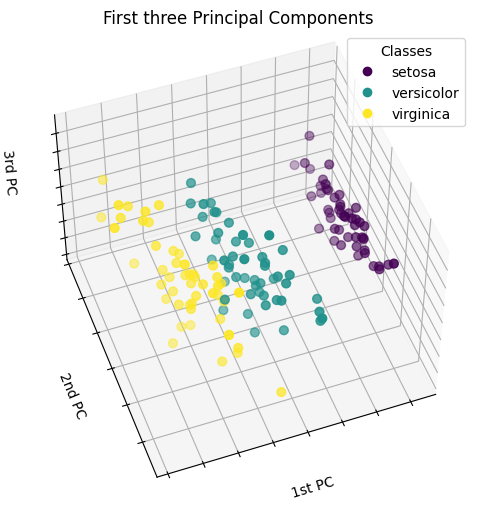

In [13]:
# Create the figure and custom axis
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-130, azim=110)

# Perform simple PCA
X_reduced = PCA(n_components=3).fit_transform(iris.data)

# Plot the 3 PCs 
plot1 = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

# Finishing touches 
ax.set_title("First three Principal Components ")
ax.set_xlabel("1st PC")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd PC")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd PC")
ax.zaxis.set_ticklabels([])

# Add legend
ax.legend(
    plot1.legend_elements()[0], iris.target_names, loc="best", title="Classes")

plt.show()
# NB: this approach is heavily inspired by the original visualisation on sklearn website 

We can observe a really good separation between setosa and the other two, which are much closer and even overlapping, yet form fairly distinct clouds

In [ ]:

# from sklearn.datasets import fetch_20newsgroups
# newsgroups_train = fetch_20newsgroups()
